In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [3]:
df = pd.read_csv("city_energy_consumption.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Date,ZoneID,AvgTemperature,Humidity,SpecialEvent,EnergyConsumption
0,2025-01-01,Zone_1,20.99,58.62,0,270.05
1,2025-01-01,Zone_2,20.64,62.79,0,363.52
2,2025-01-01,Zone_3,19.06,65.43,0,378.47
3,2025-01-01,Zone_4,18.15,33.87,0,440.40
4,2025-01-01,Zone_5,17.97,63.14,0,471.43


In [4]:
# Check missing values
df.isnull().sum()


Date                 0
ZoneID               0
AvgTemperature       0
Humidity             0
SpecialEvent         0
EnergyConsumption    0
dtype: int64

In [5]:
# Add Month column
df['Month'] = df['Date'].dt.month


In [6]:
monthly_avg = df.groupby('Month')['EnergyConsumption'].mean()
monthly_avg


Month
1     403.675548
2     418.805929
3     423.043226
4     422.508667
5     417.640387
6     407.551000
7     391.272387
8     378.782258
9     372.025667
10    370.621161
11    375.015800
12    387.017161
Name: EnergyConsumption, dtype: float64

In [7]:
zone_avg = df.groupby('ZoneID')['EnergyConsumption'].mean()
zone_avg


ZoneID
Zone_1    298.818301
Zone_2    345.539123
Zone_3    398.334274
Zone_4    446.938658
Zone_5    496.304110
Name: EnergyConsumption, dtype: float64

In [8]:
correlation = df[['AvgTemperature','Humidity','SpecialEvent','EnergyConsumption']].corr()
correlation


,AvgTemperature,Humidity,SpecialEvent,EnergyConsumption
AvgTemperature,1.000000,0.034505,-0.082455,0.254730
Humidity,0.034505,1.000000,-0.011686,0.034455
SpecialEvent,-0.082455,-0.011686,1.000000,0.276778
EnergyConsumption,0.254730,0.034455,0.276778,1.000000


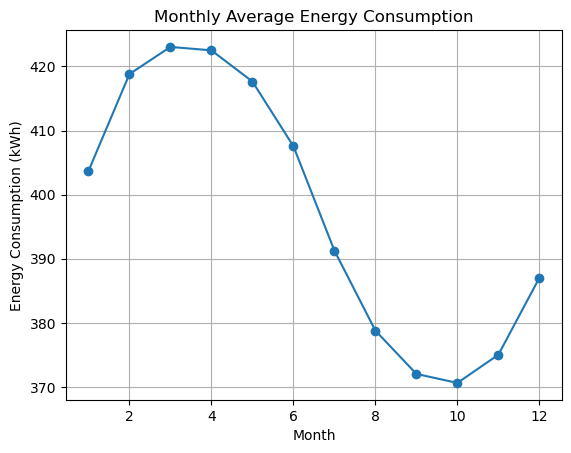

In [9]:
plt.figure()
monthly_avg.plot(marker='o')
plt.title("Monthly Average Energy Consumption")
plt.xlabel("Month")
plt.ylabel("Energy Consumption (kWh)")
plt.grid(True)
plt.show()


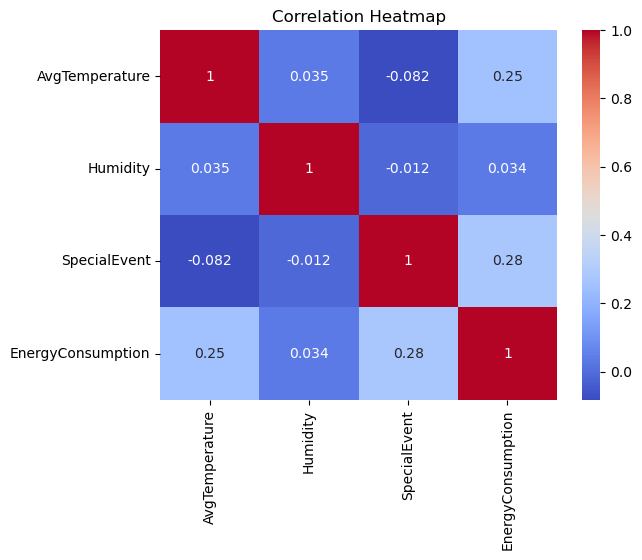

In [10]:
plt.figure()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


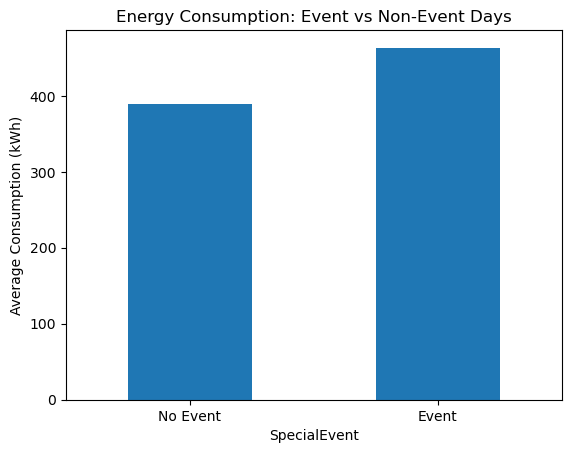

In [11]:
event_usage = df.groupby('SpecialEvent')['EnergyConsumption'].mean()

plt.figure()
event_usage.plot(kind='bar')
plt.xticks([0,1], ['No Event','Event'], rotation=0)
plt.title("Energy Consumption: Event vs Non-Event Days")
plt.ylabel("Average Consumption (kWh)")
plt.show()


In [12]:
X = df[['AvgTemperature','Humidity','SpecialEvent']]
y = df['EnergyConsumption']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", round(mae, 2))


Mean Absolute Error: 62.46


In [17]:
def predict_energy():
    try:
        zone = input("Enter Zone ID (Zone_1 to Zone_5): ")
        temp = float(input("Enter tomorrow's temperature (°C): "))
        humidity = float(input("Enter tomorrow's humidity (%): "))
        event = int(input("Special Event? (0 = No, 1 = Yes): "))

        if zone not in df['ZoneID'].unique():
            raise ValueError("Invalid Zone ID")

        if event not in [0,1]:
            raise ValueError("Event must be 0 or 1")

        prediction = model.predict([[temp, humidity, event]])
        print(f"\n🔮 Predicted Energy Consumption for {zone}: {prediction[0]:.2f} kWh")

    except Exception as e:
        print("Error:", e)
predict_energy()


Enter Zone ID (Zone_1 to Zone_5):  Zone_1
Enter tomorrow's temperature (°C):  35
Enter tomorrow's humidity (%):  65
Special Event? (0 = No, 1 = Yes):  1



🔮 Predicted Energy Consumption for Zone_1: 510.77 kWh


C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
